# PLOTLY

## Some important charts made by use of Plotly 

- Introduction to Plotly
- Scatter Plots
- Line Charts
- Bar Plot
- Bubble Plot
- Box Plot
- Histograms
- Distplots
- Heatmaps

## 0. Installing Plotly
Use the Conda install plotly command. Visit the following link
https://anaconda.org/plotly/plotly

## 1. Introduction to Plotly

1. Until now we did visualisations using Matplotlib, Seaborn and Pandas. All of them produce static image files.

2. Plotly is company based out in Canada famous for it's products like Plotly and Dash

3. Plotly creates interactive visualisations in the form of HTML files

4. Drawback- can't work with a live data source

5. Dash is used to create live data based dashboards.

In [1]:
import numpy as np
import pandas as pd
import plotly.offline as pyo
import plotly.graph_objs as go

In [2]:
match=pd.read_csv('matches.csv')
delivery=pd.read_csv('deliveries.csv')

ipl=delivery.merge(match,left_on='match_id',right_on='id')
ipl.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


## 2- Scatter Plots

- Scatter plots are drawn between to continous variables
- Problem :- We are going to draw a scatter plot between Batsman Avg(X axis) and
- Batsman Strike Rate(Y axis) of the top 50 batsman in IPL(All time)

In [3]:
# Avg vs SR graph of Top 50 batsman(in terms of total runs)

# Fetching a new dataframe with Top 50 batsman
top50=ipl.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(50).index.tolist()
new_ipl=ipl[ipl['batsman'].isin(top50)]

In [4]:
# Calculating SR
# SR=[(number of runs scored)/(number of balls played)]*100
runs=new_ipl.groupby('batsman')['batsman_runs'].sum()
balls=new_ipl.groupby('batsman')['batsman_runs'].count()

sr=(runs/balls)*100

sr=sr.reset_index()
sr

,batsman,batsman_runs
0,AB de Villiers,145.129059
1,AC Gilchrist,133.054662
2,AJ Finch,126.299213
3,AM Rahane,117.486549
4,AT Rayudu,123.014257
5,BB McCullum,126.318203
6,BJ Hodge,121.422376
7,CH Gayle,144.194313
8,DA Miller,137.709251
9,DA Warner,138.318401


In [5]:
# Calculating Avg
# Avg=(Total number of Runs)/(Number of outs)

# Calculating number of outs for top 50 batsman
out=ipl[ipl['player_dismissed'].isin(top50)]

nouts=out['player_dismissed'].value_counts()

avg=runs/nouts

avg=avg.reset_index()
avg.rename(columns={'index':'batsman',0:'avg'},inplace=True)

avg=avg.merge(sr,on='batsman')
avg

,batsman,avg,batsman_runs
0,AB de Villiers,38.307692,145.129059
1,AC Gilchrist,27.223684,133.054662
2,AJ Finch,27.186441,126.299213
3,AM Rahane,33.593407,117.486549
4,AT Rayudu,27.146067,123.014257
5,BB McCullum,28.112245,126.318203
6,BJ Hodge,33.333333,121.422376
7,CH Gayle,41.022472,144.194313
8,DA Miller,34.733333,137.709251
9,DA Warner,40.140000,138.318401


In [8]:
out

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
11,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,5,DA Warner,S Dhawan,A Choudhary,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
64,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,11,3,S Dhawan,MC Henriques,STR Binny,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
116,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,19,4,Yuvraj Singh,DJ Hooda,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
165,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,7,3,CH Gayle,TM Head,DJ Hooda,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
234,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,18,3,SR Watson,S Aravind,A Nehra,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150317,636,1,Sunrisers Hyderabad,Royal Challengers Bangalore,18,3,BCJ Cutting,NV Ojha,SR Watson,0,...,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
150402,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,11,3,CH Gayle,V Kohli,BCJ Cutting,0,...,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
150416,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,13,5,V Kohli,AB de Villiers,BB Sran,0,...,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
150422,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,14,5,AB de Villiers,KL Rahul,Bipul Sharma,0,...,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN


In [9]:
nouts

SK Raina            134
G Gambhir           131
RG Sharma           129
RV Uthappa          128
V Kohli             118
KD Karthik          117
S Dhawan            109
PA Patel            107
Yuvraj Singh        101
DA Warner           100
V Sehwag             99
YK Pathan            98
BB McCullum          98
M Vijay              95
MS Dhoni             94
AB de Villiers       91
AM Rahane            91
AT Rayudu            89
CH Gayle             89
SR Watson            85
JH Kallis            85
DR Smith             84
KA Pollard           82
MK Pandey            78
R Dravid             77
AC Gilchrist         76
NV Ojha              74
RA Jadeja            72
SR Tendulkar         69
KC Sangakkara        65
DPMD Jayawardene     64
SE Marsh             63
WP Saha              61
AJ Finch             59
MK Tiwary            56
SV Samson            56
DJ Bravo             55
SC Ganguly           53
MEK Hussey           51
JP Duminy            50
DJ Hussey            49
GJ Maxwell      

In [13]:
# scatter plot 

trace= go.Scatter(x=avg['avg'], y=avg['batsman_runs'],
                 mode='markers', text=avg['batsman'],
                 marker={'color' : '#00a65a', 'size':16})
data=[trace]

layout=go.Layout(title='Batsman Avg VS SR',
                xaxis={'title': 'Batsman Average'},
                yaxis={'title': 'BAtsman Strike Rate'})

fig=go.Figure(data=data,layout=layout)

pyo.plot(fig, filename='myfile.html')

'myfile.html'

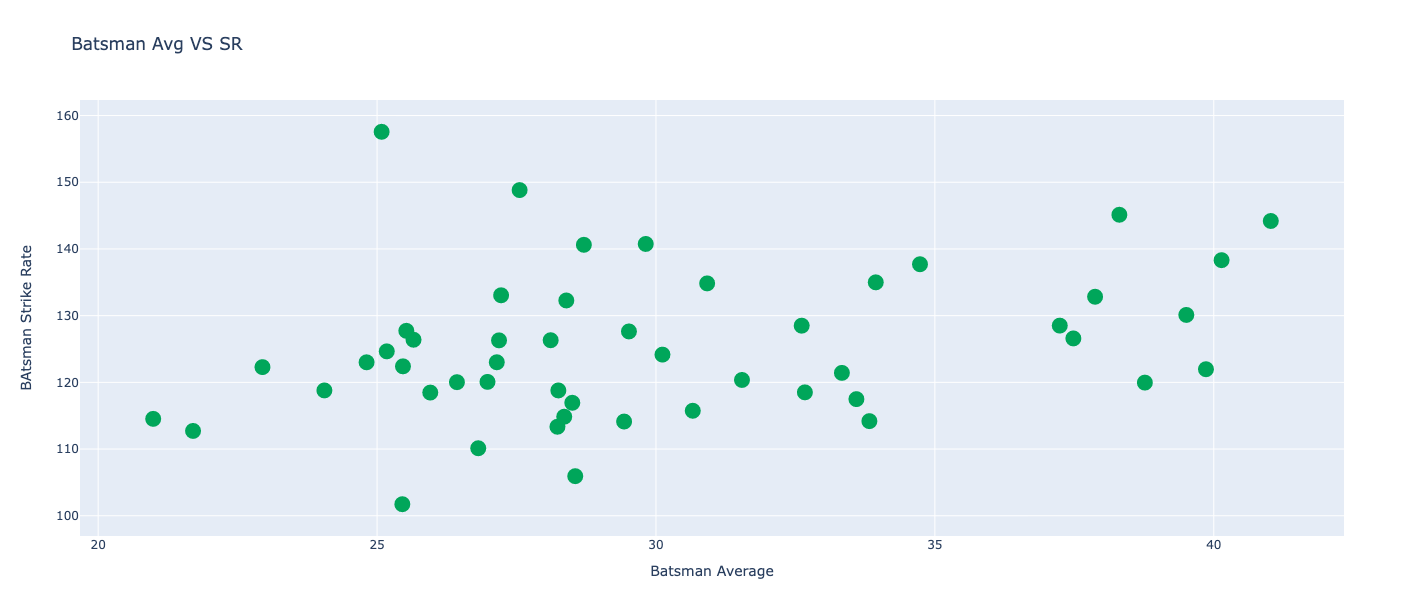

# 3-  Line Chart

It's an extension of Scatter plot. Usually used to show a time series data

In [11]:
# Year by Year batsman performance
# Virat Kohli Performance
single=ipl[ipl['batsman']=='V Kohli']
performance=single.groupby('season')['batsman_runs'].sum().reset_index()
performance

,season,batsman_runs
0,2008,165
1,2009,246
2,2010,307
3,2011,557
4,2012,364
5,2013,639
6,2014,359
7,2015,505
8,2016,973
9,2017,308


In [14]:
# Plot Line Chart 

trace=go.Scatter(x=performance['season'], y=performance['batsman_runs'],
                mode='lines',
                marker={'color':'#00a65a'})

data=[trace]

layout=go.Layout(title= 'Year by Year Performance',
                xaxis={'title':'season'},
                yaxis={'title': 'Total runs'})
fig=go.Figure(data=data,layout=layout)

pyo.plot(fig)

'temp-plot.html'

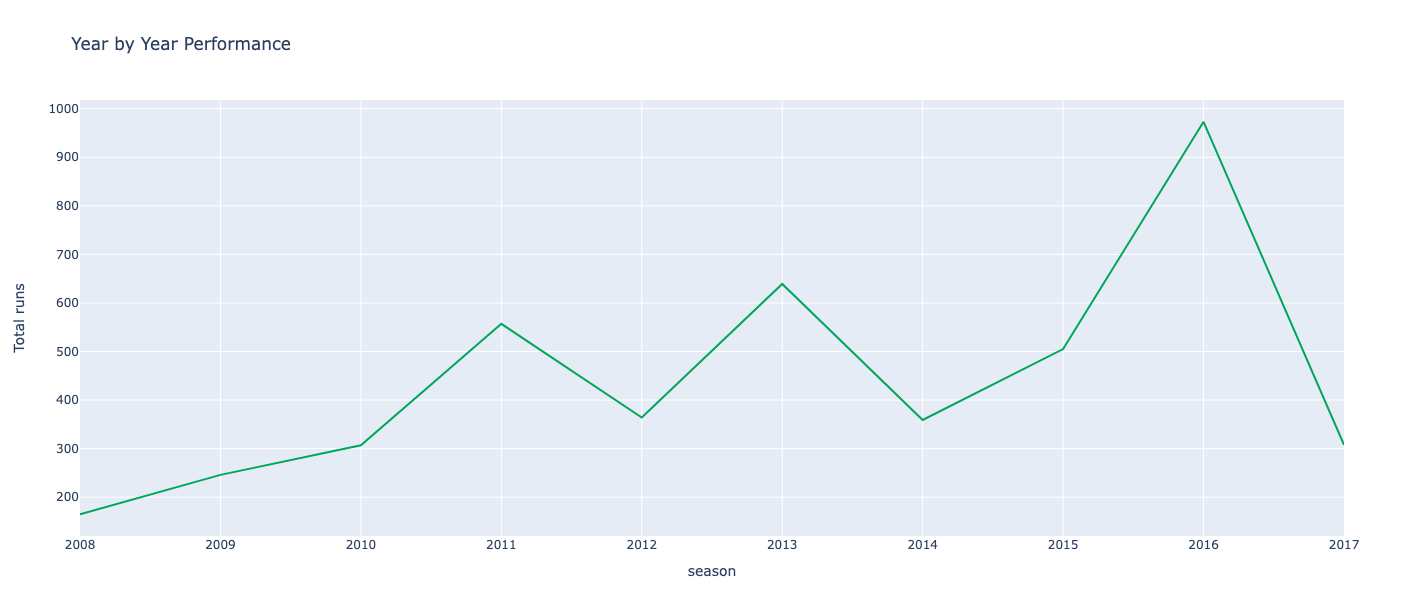

In [17]:
# Year by Year "MS Dhoni"performance

single1=ipl[ipl['batsman']=='MS Dhoni']
performance1=single1.groupby('season')['batsman_runs'].sum().reset_index()
performance1

,season,batsman_runs
0,2008,414
1,2009,332
2,2010,287
3,2011,392
4,2012,357
5,2013,461
6,2014,371
7,2015,372
8,2016,284
9,2017,290


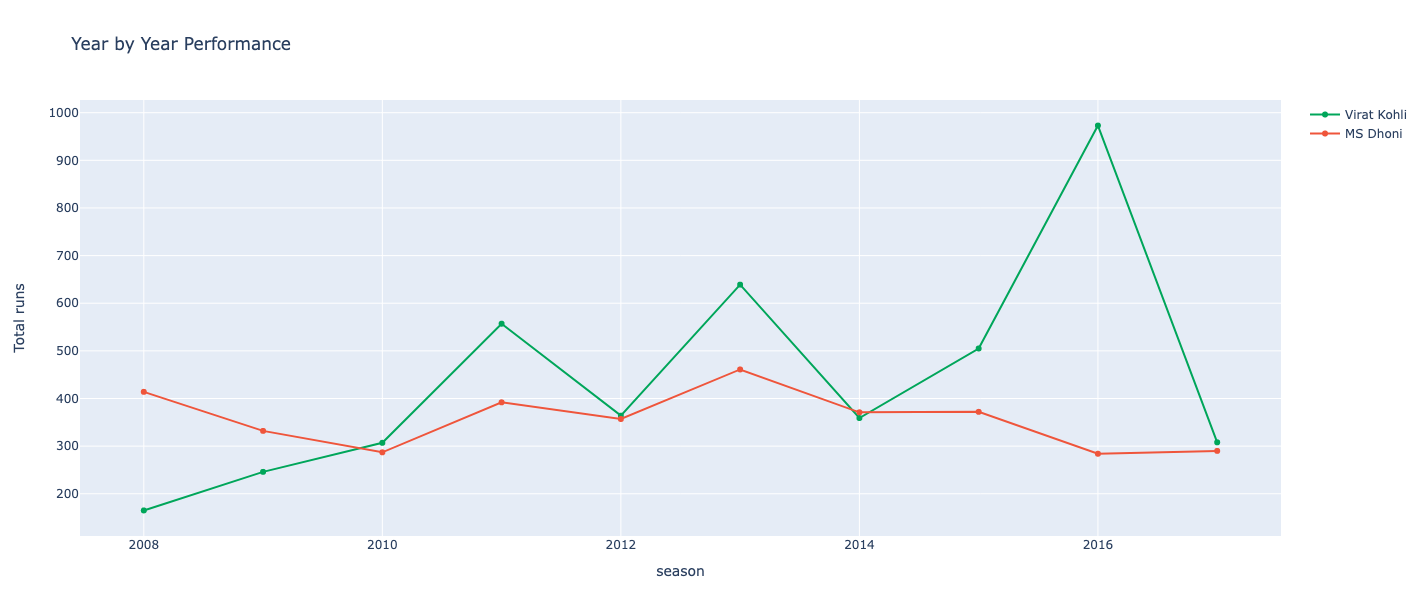

In [18]:
# Plot 2 line charts

In [20]:
trace=go.Scatter(x=performance['season'], y=performance['batsman_runs'],
                mode='lines+ markers',
                marker={'color':'#00a65a'}, name='Virat Kohli')

trace1=go.Scatter(x=performance1['season'], y=performance1['batsman_runs'],
                mode='lines+ markers', name='MS Dhoni')



data=[trace,trace1]

layout=go.Layout(title= 'Year by Year Performance',
                xaxis={'title':'season'},
                yaxis={'title': 'Total runs'})
fig=go.Figure(data=data,layout=layout)

pyo.plot(fig)

'temp-plot.html'

##### Multiple Line Charts function just add batsman setails as trace1, trace 2, trace3 and so on


In [40]:
# Multiple Line Charts function just add batsman setails as trace1, trace 2, trace3 and so on

def batsman_comp(*name):
    data=[]
    for i in name:
        single=ipl[ipl['batsman']==i]
        performance=single.groupby('season')['batsman_runs'].sum().reset_index()

        trace=go.Scatter(x=performance['season'],y=performance['batsman_runs']
                         ,mode='lines+markers',name=i)
        
        data.append(trace)
    
    layout=go.Layout(title='Batsman Record Comparator',
                xaxis={'title':'Season'},
                yaxis={'title':'Runs'})

    fig=go.Figure(data=data,layout=layout)

  
    pyo.plot(fig,filename='year_by_year')

        

In [41]:
batsman_comp('V Kohli ', 'G Gambhir', 'SK Raina ','KD Karthik')

/Users/nimishasingh/anaconda3/lib/python3.10/site-packages/plotly/offline/offline.py:562: UserWarning:

Your filename `year_by_year` didn't end with .html. Adding .html to the end of your file.



# 4. Bar Plot
Used to show relation between one categorical and 1 numerical data

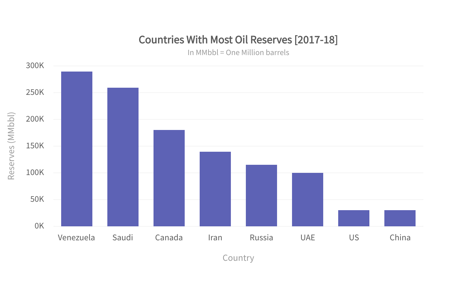

In [43]:
top10=ipl.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10).index.tolist()
top10_df=ipl[ipl['batsman'].isin(top10)]

In [44]:
top10_score=top10_df.groupby('batsman')['batsman_runs'].sum().reset_index()
top10_score

,batsman,batsman_runs
0,AB de Villiers,3486
1,CH Gayle,3651
2,DA Warner,4014
3,G Gambhir,4132
4,MS Dhoni,3560
5,RG Sharma,4207
6,RV Uthappa,3778
7,S Dhawan,3561
8,SK Raina,4548
9,V Kohli,4423


In [45]:
# Plot Bar Graph

In [46]:
trace=go.Bar(x=top10_score['batsman'],y=top10_score['batsman_runs'])

data=[trace]

layout=go.Layout(title='Top 10 IPL batsman',
                xaxis={'title':'Batsman'},
                yaxis={'title':'Total Runs'})

fig=go.Figure(data=data,layout=layout)

pyo.plot(fig)

'temp-plot.html'

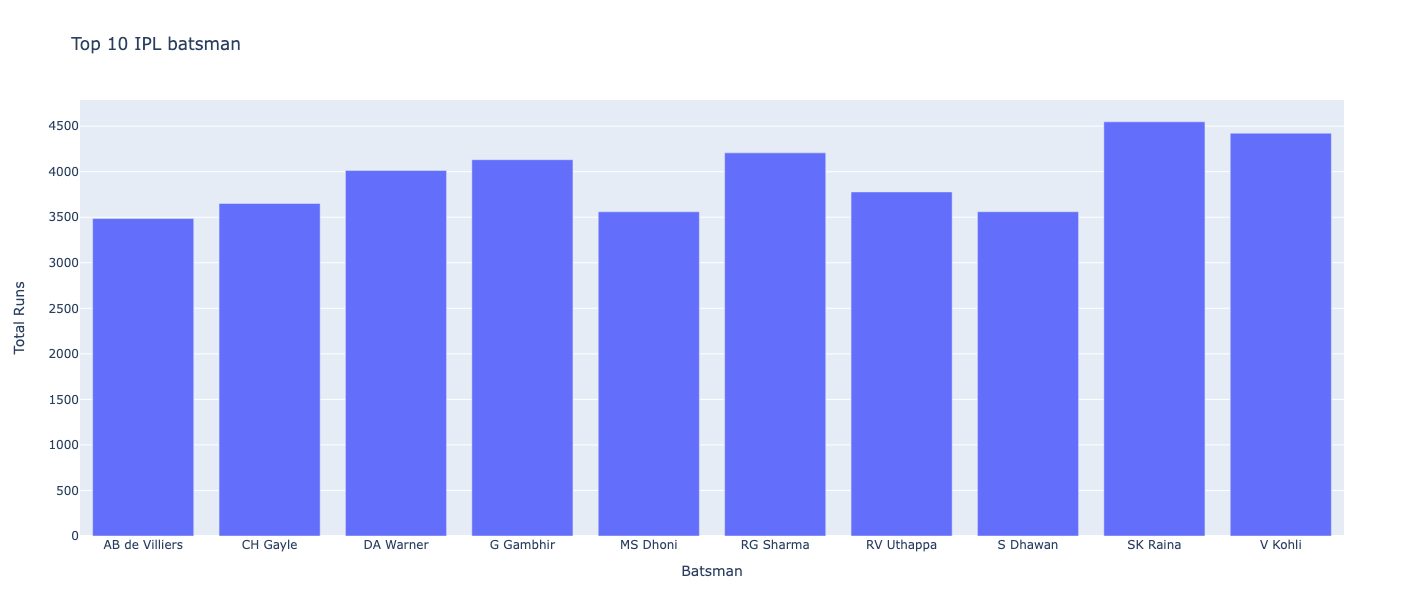

## There are 3 types of Bar Graphs
1. Nested Bar Graph
2. Stacked Bar Graph
3. Overlayed Bar Graph

In [47]:
iw=top10_df.groupby(['batsman','inning'])['batsman_runs'].sum().reset_index()
mask=iw['inning']==1
mask2=iw['inning']==2
one=iw[mask]
two=iw[mask2]


one.rename(columns={'batsman_runs':'1st Innings'},inplace=True)
two.rename(columns={'batsman_runs':'2nd Innings'},inplace=True)

final=one.merge(two,on='batsman')[['batsman','1st Innings','2nd Innings']]

final

/var/folders/2t/mgksmkvx0r122pmd1rqbt8yc0000gn/T/ipykernel_19796/3773990239.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/2t/mgksmkvx0r122pmd1rqbt8yc0000gn/T/ipykernel_19796/3773990239.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,batsman,1st Innings,2nd Innings
0,AB de Villiers,2128,1345
1,CH Gayle,2003,1623
2,DA Warner,2118,1896
3,G Gambhir,1699,2433
4,MS Dhoni,2232,1328
5,RG Sharma,2344,1863
6,RV Uthappa,1516,2262
7,S Dhawan,2262,1299
8,SK Raina,2647,1893
9,V Kohli,2391,2027


In [48]:
# Plot Bar Chart here

## 1- Overlayed Bar Graph

In [52]:
# 1- Overlayed Bar Graph

trace1=go.Bar(x=final['batsman'], y= final['1st Innings'], name='1st innings',
             marker={'color':'#00a65a'})
trace2=go.Bar(x=final['batsman'], y=final['2nd Innings'], name = '2nd innings',
             marker={'color':'#a6a65a'})

data=[trace1,trace2]

layout=go.Layout(title='Inning Wise Scores',
                xaxis={'title': 'Batsman'},
                yaxis={'title': 'Runs'},
                barmode='overlay')

fig=go.Figure(data=data,layout=layout)
pyo.plot(fig)

'temp-plot.html'

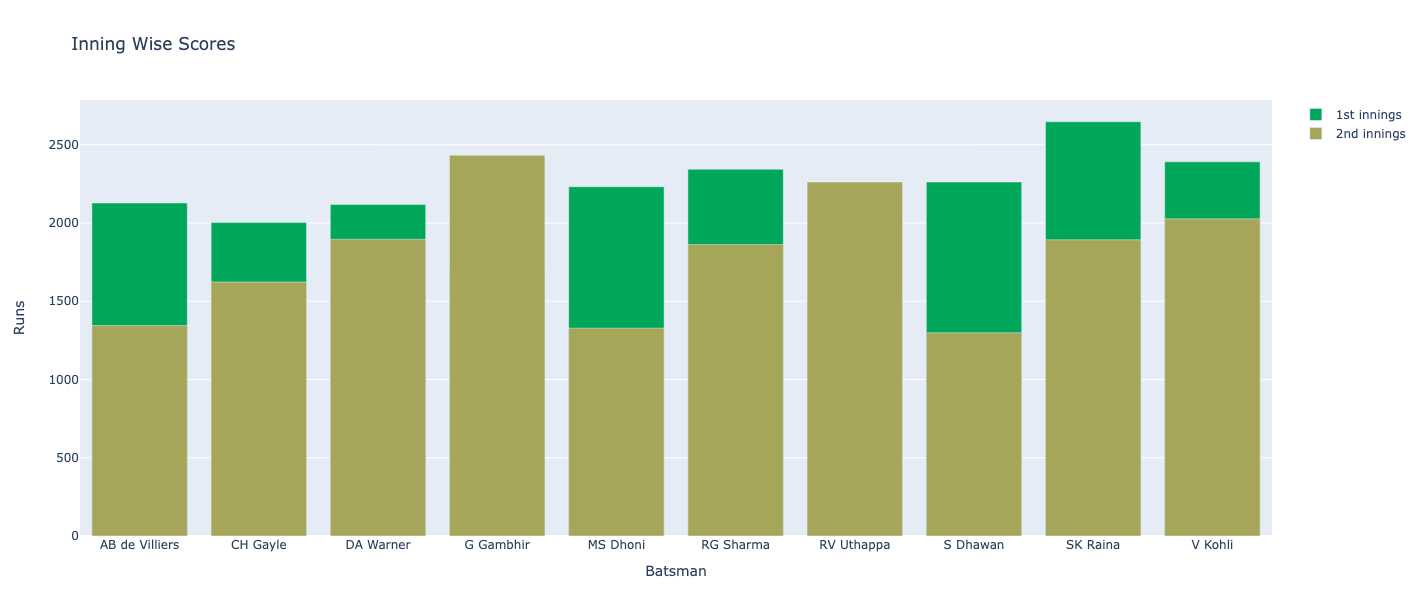

## 2- Stack Bar Graph

In [53]:
# 2- Stack Bar Graph

trace1=go.Bar(x=final['batsman'], y= final['1st Innings'], name='1st innings',
             marker={'color':'#00a65a'})
trace2=go.Bar(x=final['batsman'], y=final['2nd Innings'], name = '2nd innings',
             marker={'color':'#a6a65a'})

data=[trace1,trace2]

layout=go.Layout(title='Inning Wise Scores',
                xaxis={'title': 'Batsman'},
                yaxis={'title': 'Runs'},
                barmode='stack')

fig=go.Figure(data=data,layout=layout)
pyo.plot(fig)

'temp-plot.html'

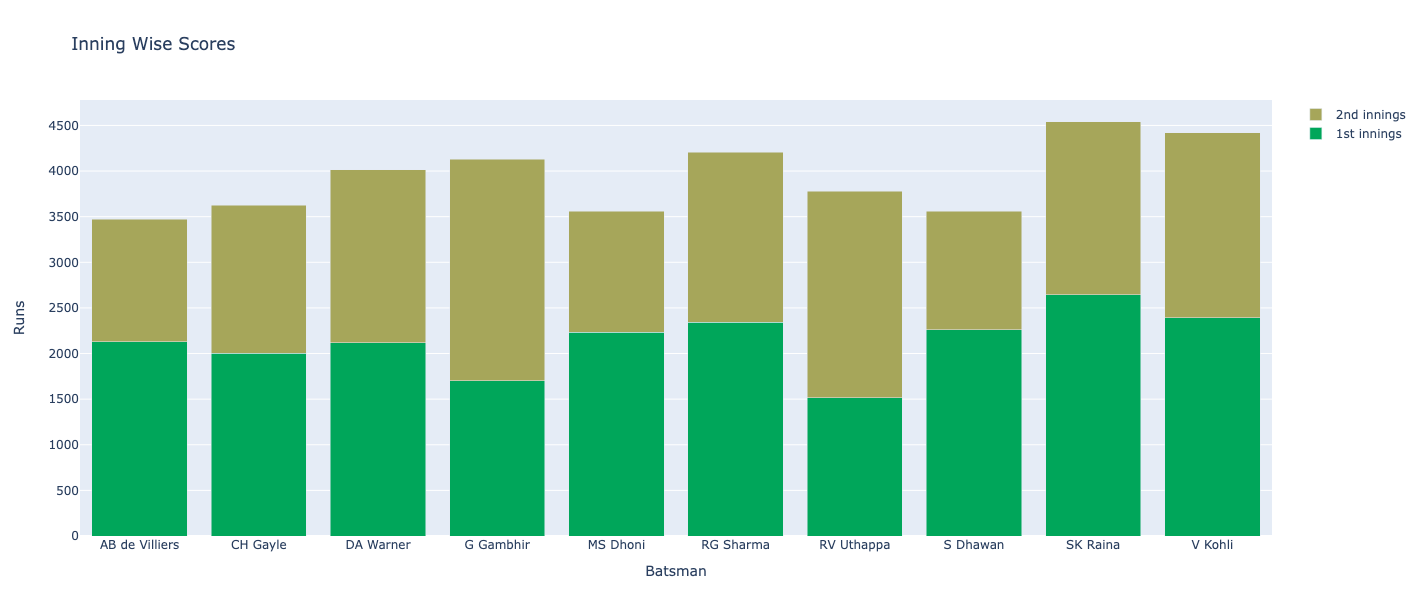

## 3- Nested Bar Graph

In [54]:
# 3- Nested Bar Graph

trace1=go.Bar(x=final['batsman'], y= final['1st Innings'], name='1st innings',
             marker={'color':'#00a65a'})
trace2=go.Bar(x=final['batsman'], y=final['2nd Innings'], name = '2nd innings',
             marker={'color':'#a6a65a'})

data=[trace1,trace2]

layout=go.Layout(title='Inning Wise Scores',
                xaxis={'title': 'Batsman'},
                yaxis={'title': 'Runs'})

fig=go.Figure(data=data,layout=layout)
pyo.plot(fig)

'temp-plot.html'

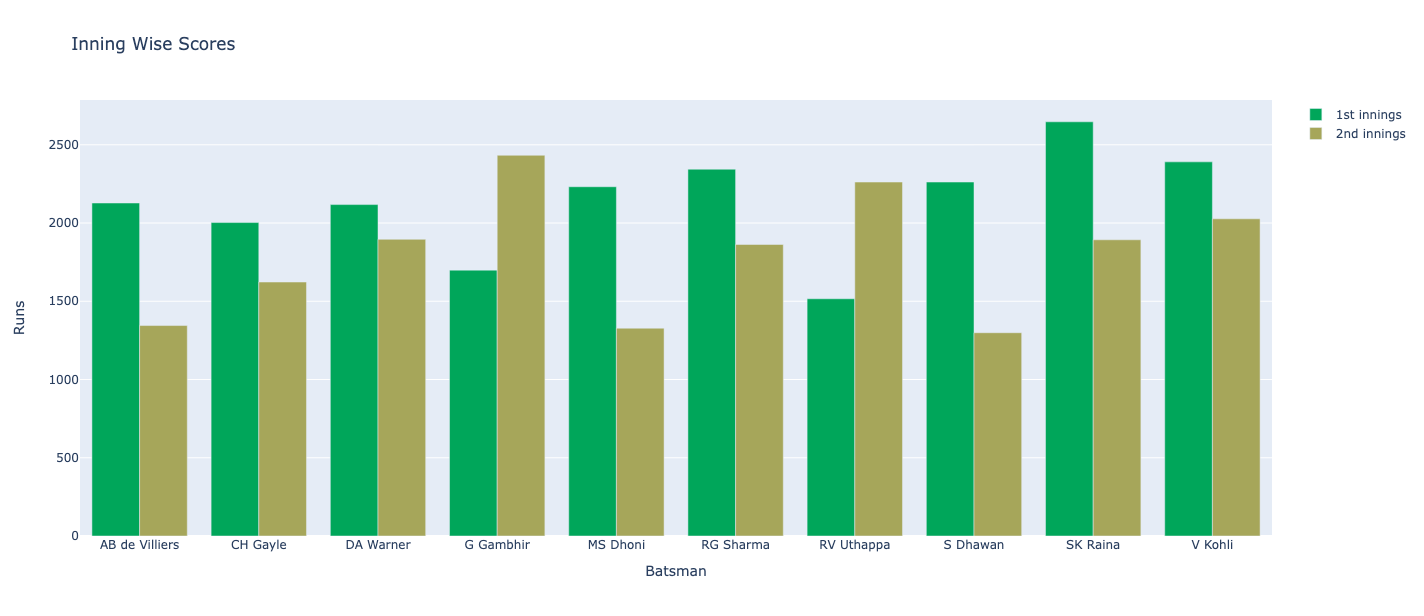

# 5 . Bubble Plot
Again an extension of Scatter plot. with some additional informations

- A bubble plot is a type of scatter plot where the size of the markers (bubbles) can be used to represent an additional dimension of the data. In a bubble plot, the x and y axes represent two variables of interest, and each data point is represented by a marker (bubble) whose size is proportional to a third variable.

- In bubble plot we can give 3 numerical data and 1 categorical data. categorical data can use for define color in graph.

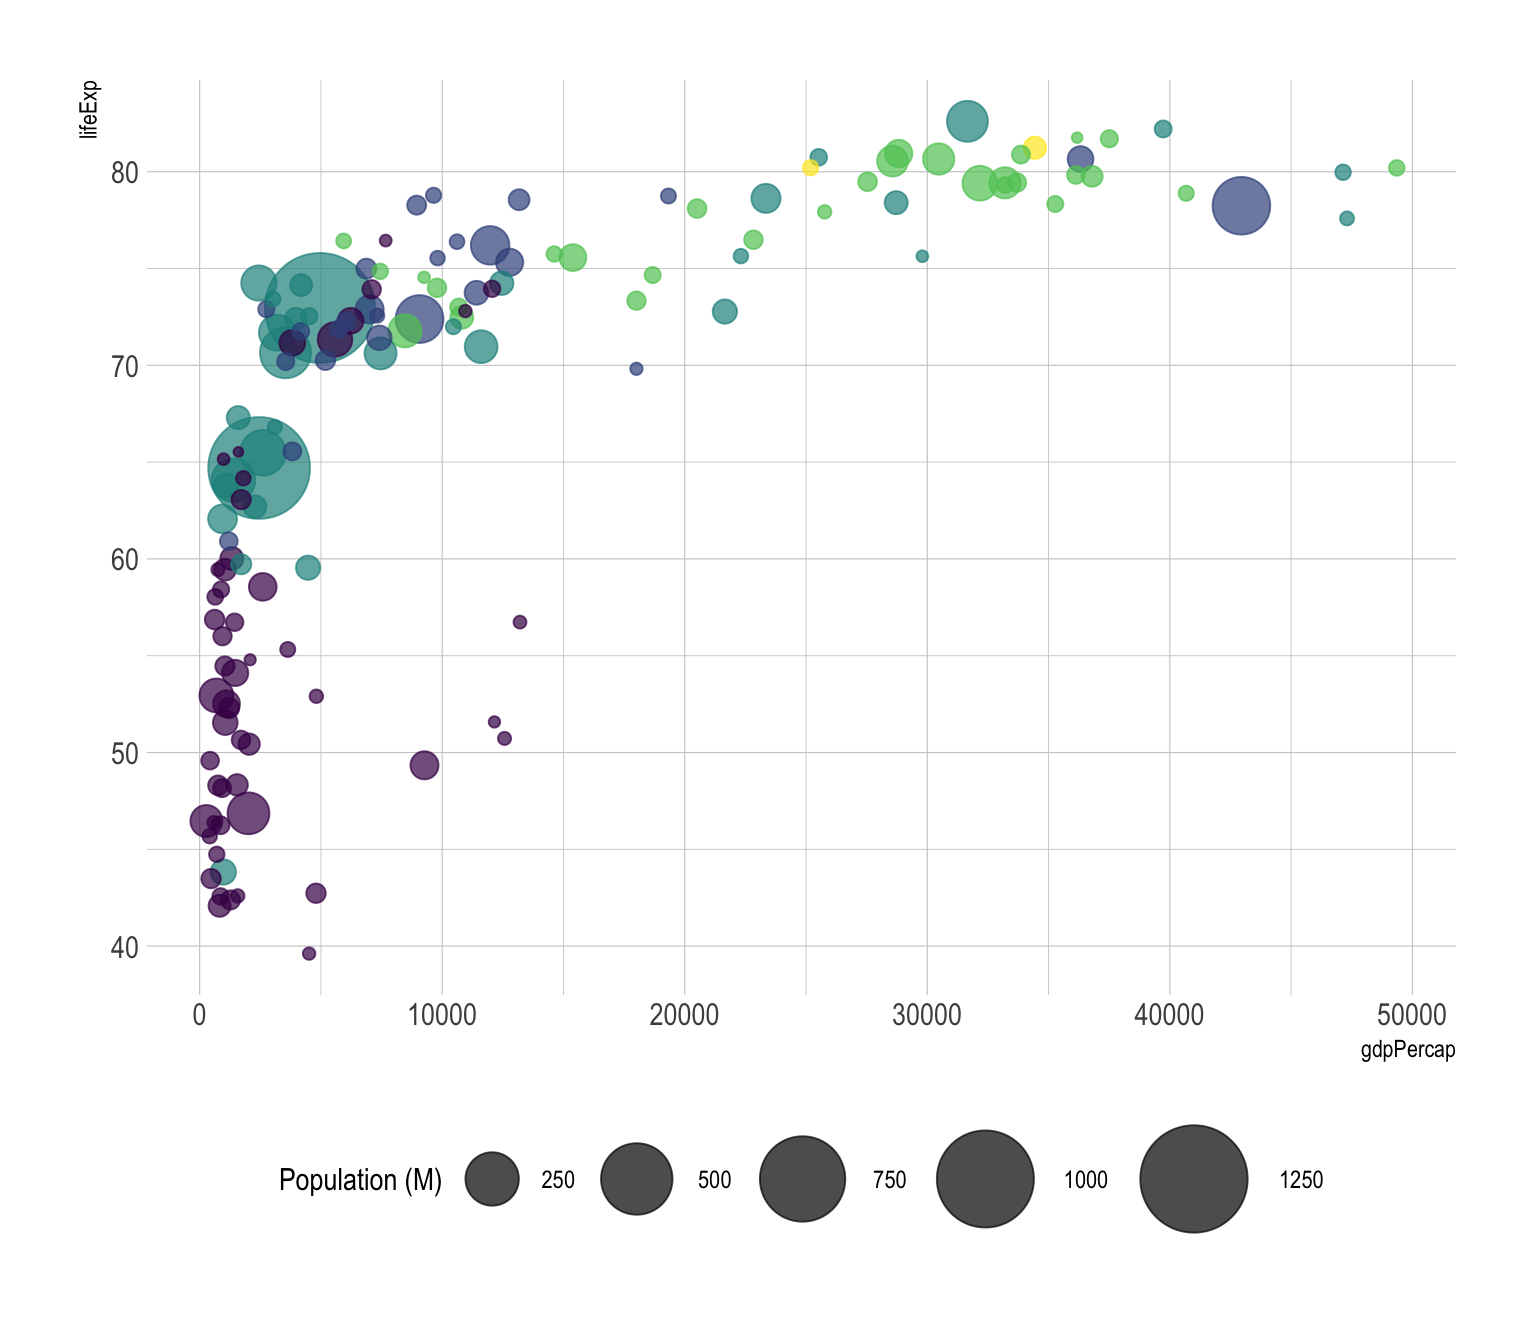

In [49]:
new_ipl=new_ipl[new_ipl['batsman_runs']==6]

six=new_ipl.groupby('batsman')['batsman_runs'].count().reset_index()

x=avg.merge(six,on='batsman')

In [50]:
# Plot Bubble chart here

In [55]:
avg

,batsman,avg,batsman_runs
0,AB de Villiers,38.307692,145.129059
1,AC Gilchrist,27.223684,133.054662
2,AJ Finch,27.186441,126.299213
3,AM Rahane,33.593407,117.486549
4,AT Rayudu,27.146067,123.014257
5,BB McCullum,28.112245,126.318203
6,BJ Hodge,33.333333,121.422376
7,CH Gayle,41.022472,144.194313
8,DA Miller,34.733333,137.709251
9,DA Warner,40.140000,138.318401


In [56]:
new_ipl

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
10,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,4,DA Warner,S Dhawan,A Choudhary,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
75,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,13,2,Yuvraj Singh,MC Henriques,A Choudhary,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
89,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,15,3,Yuvraj Singh,MC Henriques,S Aravind,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
115,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,19,3,Yuvraj Singh,DJ Hooda,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
142,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,3,6,CH Gayle,Mandeep Singh,A Nehra,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150391,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,9,4,CH Gayle,V Kohli,MC Henriques,0,...,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
150392,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,9,5,CH Gayle,V Kohli,MC Henriques,0,...,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
150395,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,10,2,V Kohli,CH Gayle,Mustafizur Rahman,0,...,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
150413,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,13,2,V Kohli,AB de Villiers,BB Sran,0,...,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN


In [60]:
new_ipl=new_ipl[new_ipl['batsman_runs'] == 6]

six =new_ipl.groupby('batsman')['batsman_runs'].count().reset_index()

In [61]:
x = avg.merge(six, on='batsman')
x

,batsman,avg,batsman_runs_x,batsman_runs_y
0,AB de Villiers,38.307692,145.129059,158
1,AC Gilchrist,27.223684,133.054662,92
2,AJ Finch,27.186441,126.299213,59
3,AM Rahane,33.593407,117.486549,60
4,AT Rayudu,27.146067,123.014257,79
5,BB McCullum,28.112245,126.318203,124
6,BJ Hodge,33.333333,121.422376,43
7,CH Gayle,41.022472,144.194313,266
8,DA Miller,34.733333,137.709251,78
9,DA Warner,40.140000,138.318401,160


In [62]:
trace=go.Scatter(x=x['avg'], y=x['batsman_runs_x'], mode='markers',
                marker={'size':x['batsman_runs_y']})

data=[trace]
layout=go.Layout(title='Bubble Chart',
                xaxis={'title':'Average'},
                yaxis={'title':'SR'})

fig=go.Figure(data=data,layout=layout)
pyo.plot(fig)

'temp-plot.html'

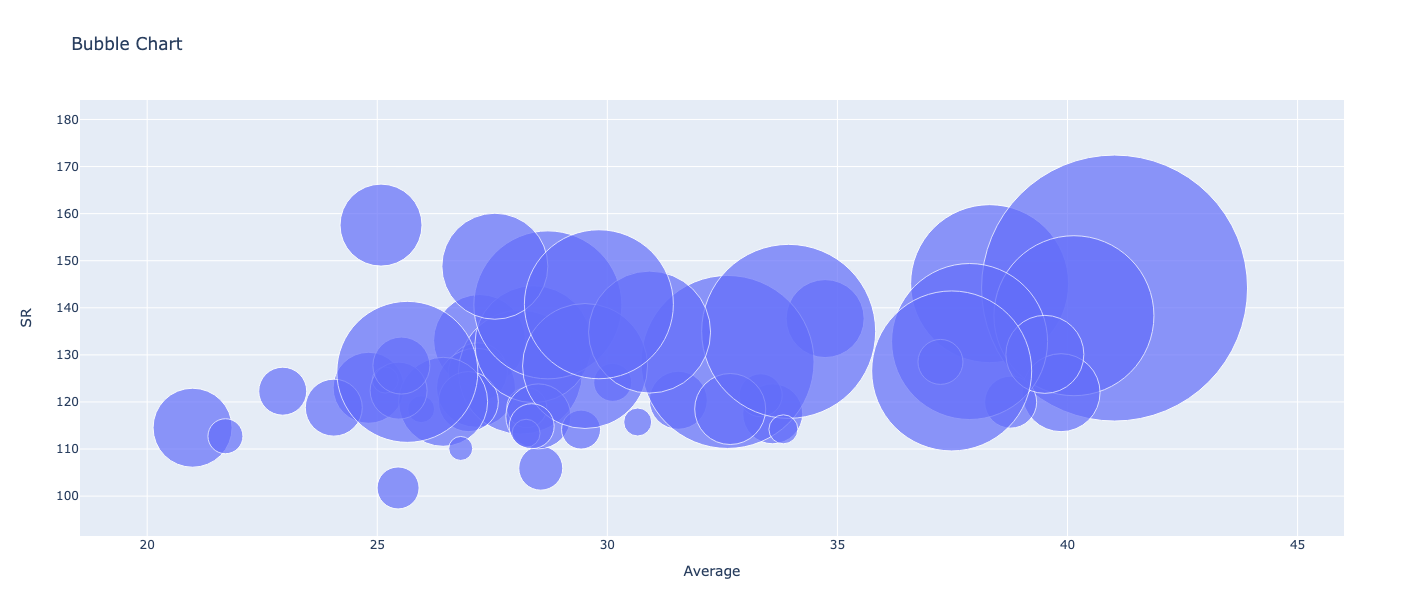

# 6. Box Plot
A box and whisker plot—also called a box plot—displays the five-number summary of a set of data.

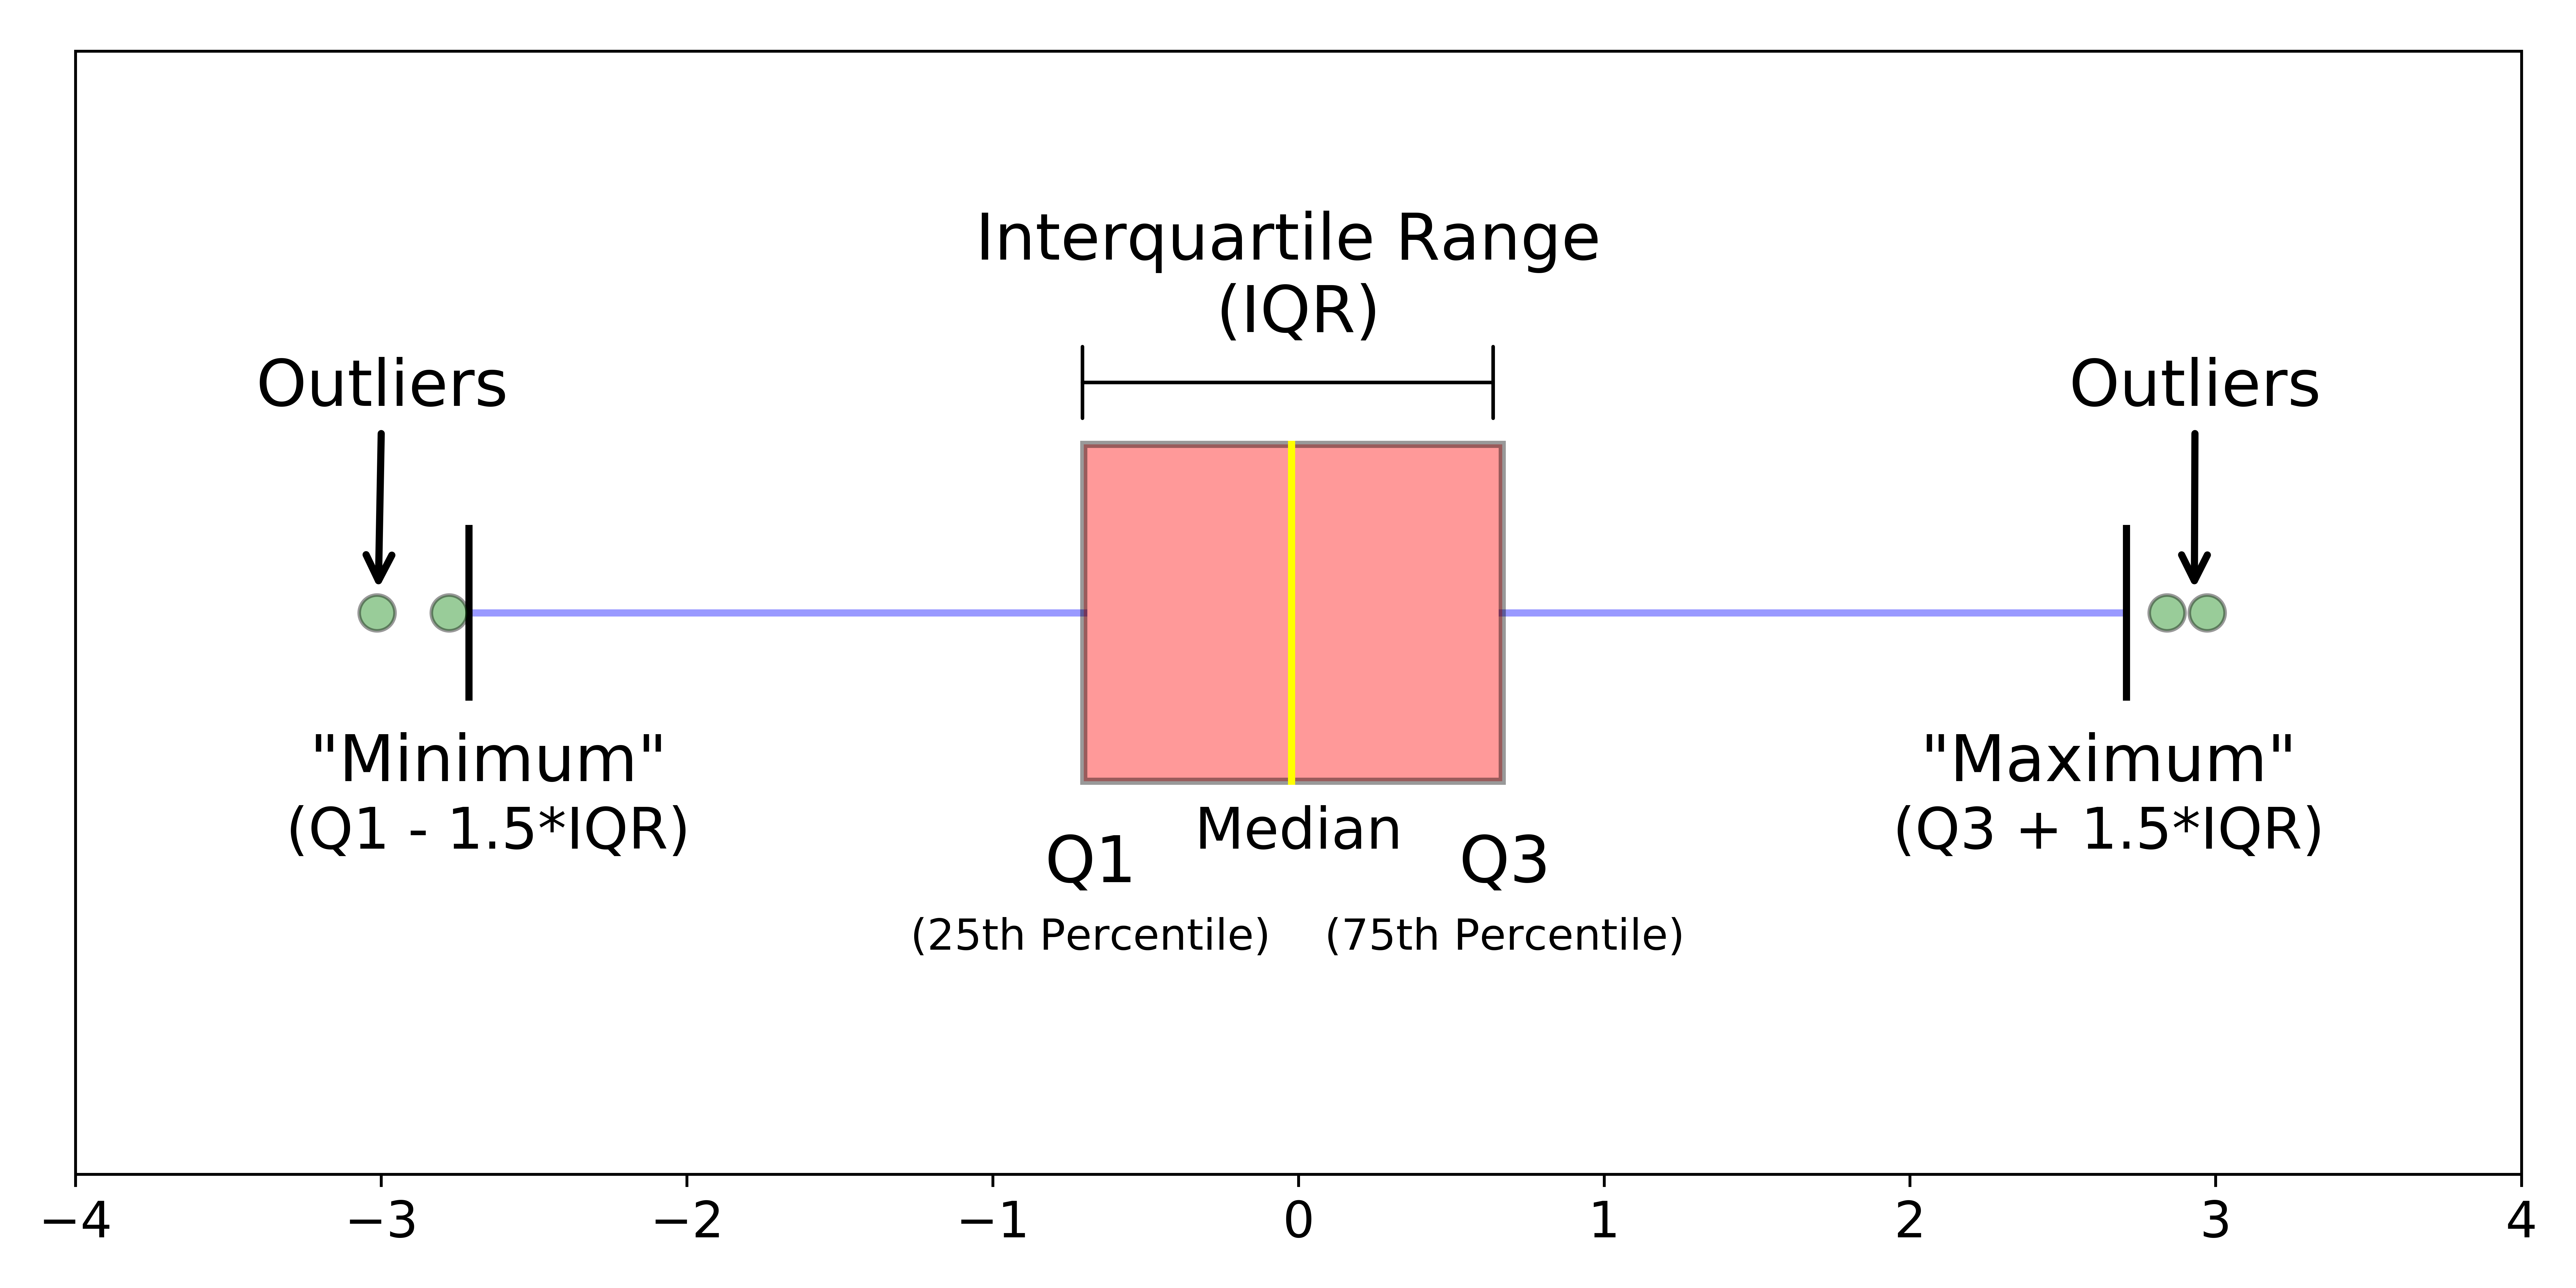

In [63]:
match_agg=delivery.groupby(['match_id'])['total_runs'].sum().reset_index()
season_wise=match_agg.merge(match,left_on='match_id',right_on='id')[['match_id','total_runs','season']]
season_wise

,match_id,total_runs,season
0,1,379,2017
1,2,371,2017
2,3,367,2017
3,4,327,2017
4,5,299,2017
...,...,...,...
631,632,277,2016
632,633,317,2016
633,634,302,2016
634,635,325,2016


### Plot Box Plot here

In [65]:
trace=go.Box(x=season_wise['total_runs'], name='All Seasons', marker={'color': '#00a65a'})

data=[trace]

layout=go.Layout(title='Total Score Analysis',
                xaxis={'title':'total_score'})

fig=go.Figure(data=data,layout=layout)

pyo.plot(fig)

'temp-plot.html'

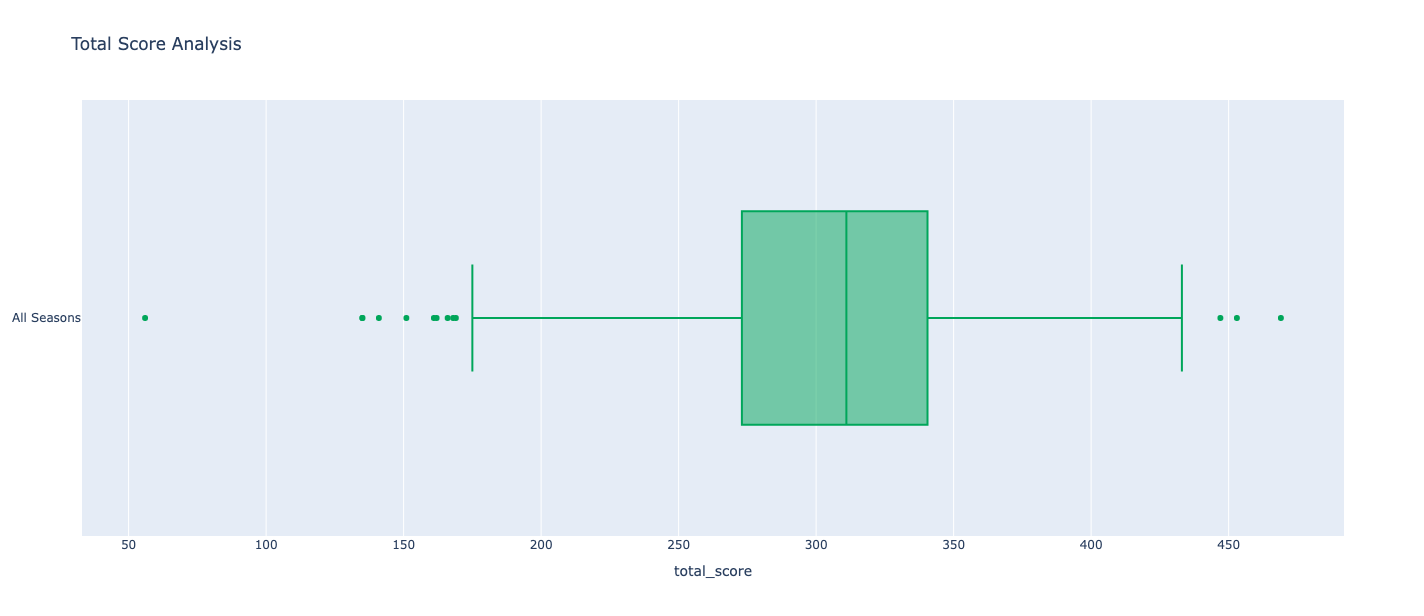

### Side by side BoxPLot Graph

In [66]:
trace1=go.Box(x=season_wise[season_wise['season']==2017]['total_runs'], name='2017', marker={'color': '#00a65a'})

trace2=go.Box(x=season_wise[season_wise['season']==2008]['total_runs'], name='2008')

data=[trace1,trace2]

layout=go.Layout(title='Total Score Analysis',
                xaxis={'title':'total_score'})

fig=go.Figure(data=data,layout=layout)

pyo.plot(fig)

'temp-plot.html'

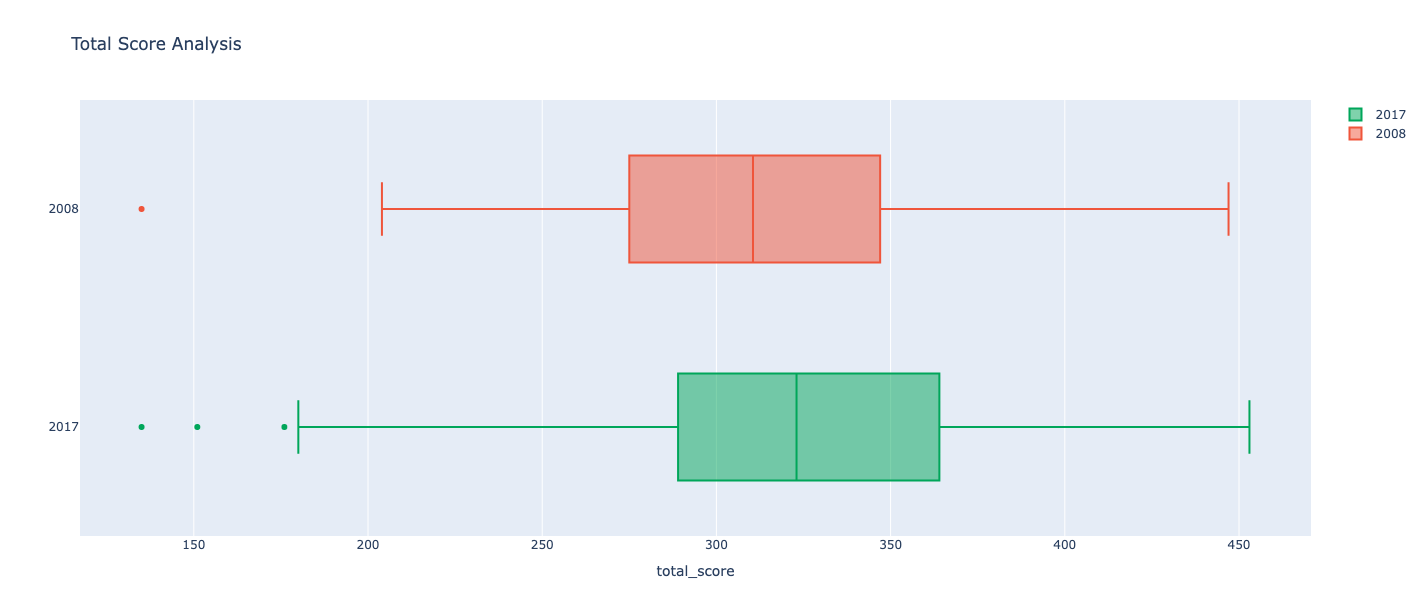

# 7. Histograms
A histogram is a plot that lets you discover, and show, the underlying frequency distribution (shape) of a set of continuous data.

- it work on numerical continuous data.

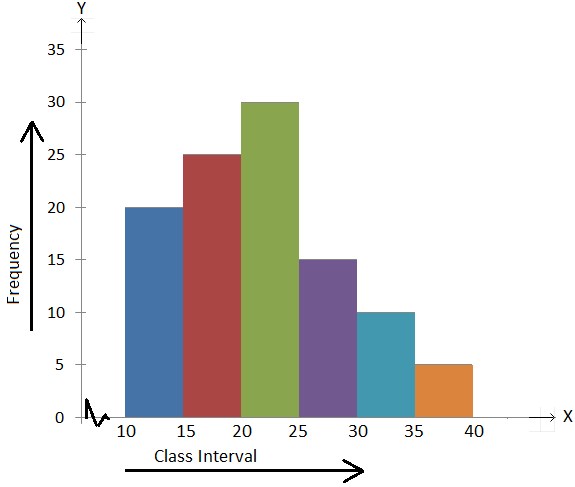

In [67]:
x=delivery.groupby('batsman')['batsman_runs'].count()>150
x=x[x].index.tolist()

new=delivery[delivery['batsman'].isin(x)]


runs=new.groupby('batsman')['batsman_runs'].sum()
balls=new.groupby('batsman')['batsman_runs'].count()

sr=(runs/balls)*100

sr=sr.reset_index()
sr

,batsman,batsman_runs
0,A Ashish Reddy,142.857143
1,A Mishra,89.005236
2,A Symonds,124.711908
3,AA Jhunjhunwala,99.541284
4,AB Agarkar,111.875000
...,...,...
157,Y Nagar,105.166052
158,Y Venugopal Rao,113.872832
159,YK Pathan,140.751445
160,YV Takawale,104.918033


### Plot Histogram

In [75]:
import plotly.graph_objs as go
import plotly.io as pio

# create the histogram trace
trace = go.Histogram(x=sr['batsman_runs'], nbinsx=20)

# create the layout
layout = go.Layout(title='Distribution of Batsmen Strike Rates',
                   xaxis=dict(title='Strike Rate'),
                   yaxis=dict(title='Frequency'))

# create the figure
fig = go.Figure(data=[trace], layout=layout)

# show the figure
pyo.plot(fig)


'temp-plot.html'

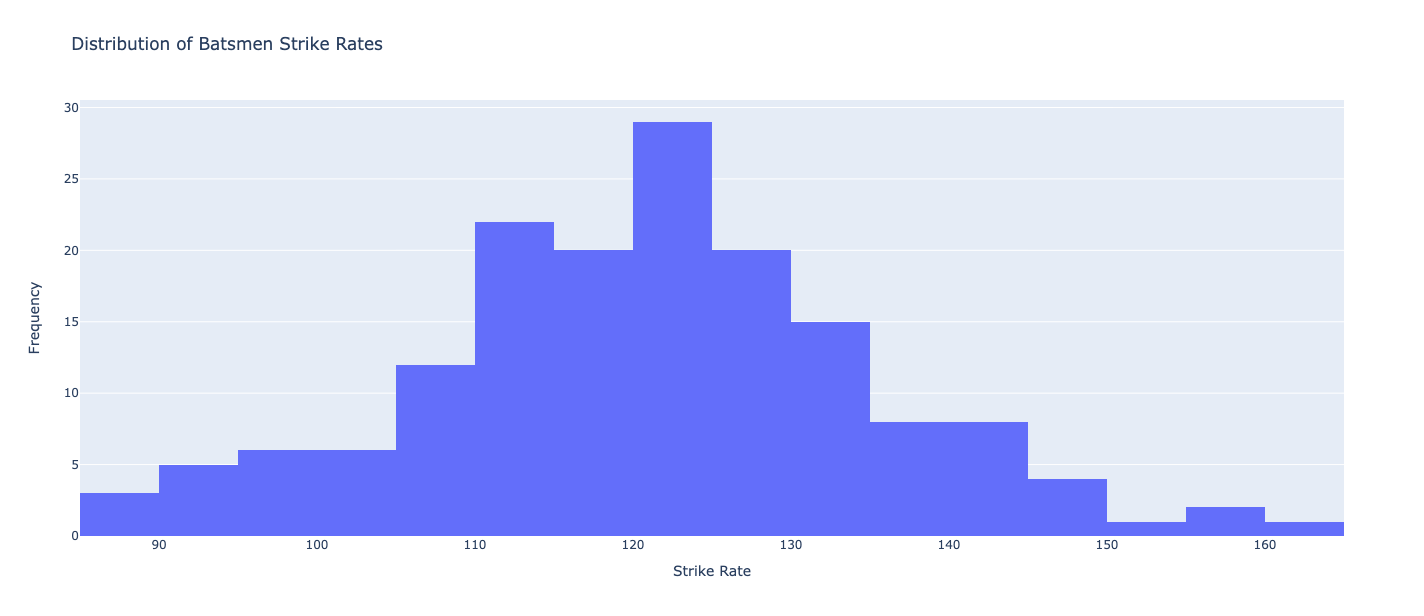

# 8. Distplots

### Its combination of 3 Plots - Histogram, kde, Rug Plot
##### rug plot do entry in particular bins so where is the rugs is dense means more entry in that bin.

A distplot (short for "distribution plot") is a type of plot that shows the distribution of a numerical variable. It combines a histogram and a kernel density estimate (KDE) plot into a single visual display. The histogram shows the distribution of the data by dividing it into a set of bins and counting the number of observations in each bin. The KDE plot shows the density of the data by estimating a continuous probability distribution function.

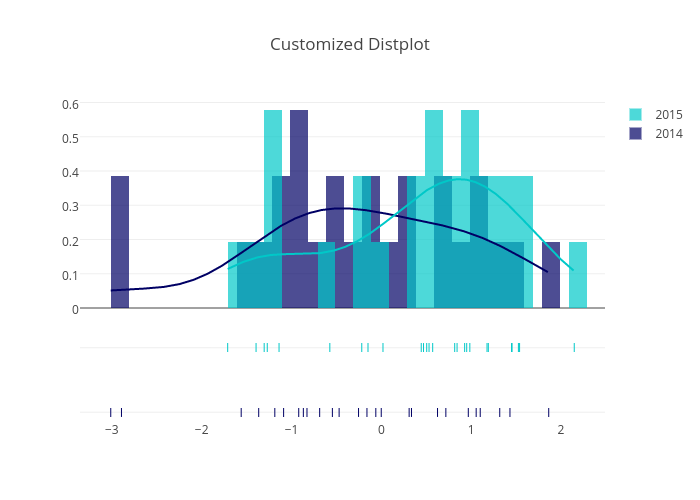

In [68]:
# Plot Distplot

import plotly.figure_factory as ff

hist_data=[avg['avg'], avg['batsman_runs']]

group_labels=['Average', 'Strike Rate']

fig=ff.create_distplot(hist_data,group_labels,bin_size=[10,20])

pyo.plot(fig)

'temp-plot.html'

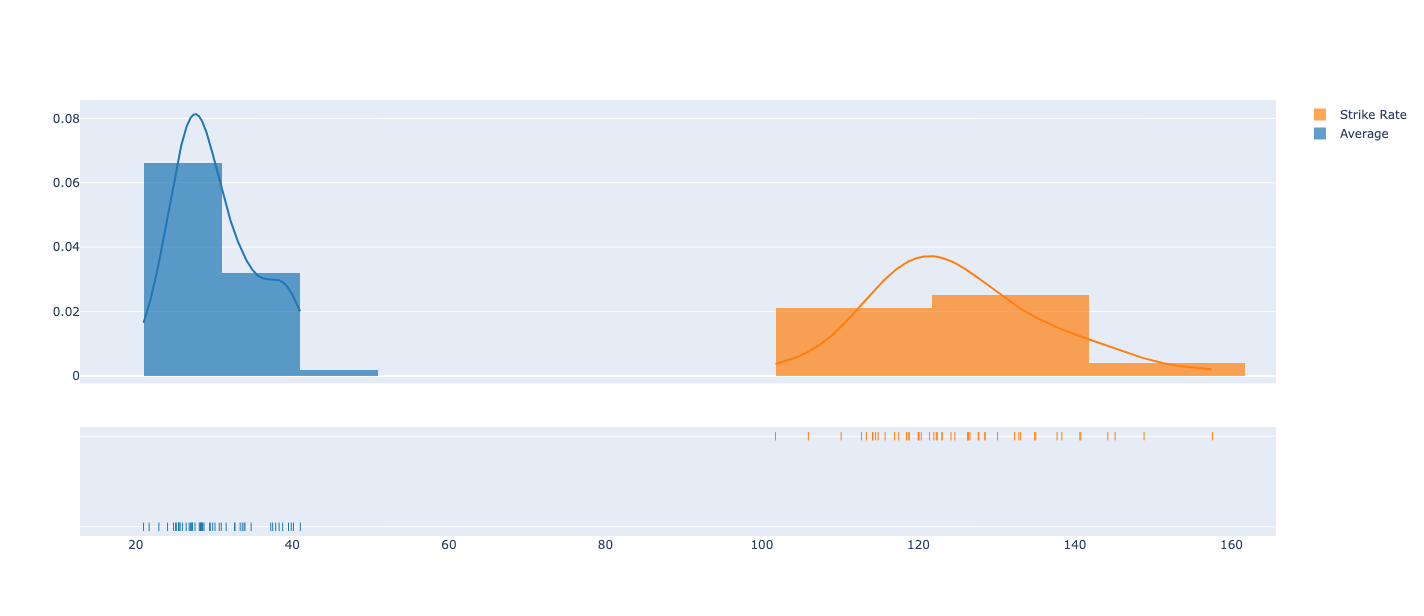

# 9. Heatmaps
A heat map is a graphical representation of data where the individual values contained in a matrix are represented as colors.

A heatmap is a graphical representation of data that uses a color-coded matrix to visualize the relationship between two variables. Heatmaps are commonly used to display the correlation between different variables in a dataset, but they can also be used to visualize any type of two-dimensional data.

In [70]:
six=delivery[delivery['batsman_runs']==6]
six=six.groupby(['batting_team','over'])['batsman_runs'].count().reset_index()

six

,batting_team,over,batsman_runs
0,Chennai Super Kings,1,5
1,Chennai Super Kings,2,17
2,Chennai Super Kings,3,37
3,Chennai Super Kings,4,34
4,Chennai Super Kings,5,41
...,...,...,...
271,Sunrisers Hyderabad,16,22
272,Sunrisers Hyderabad,17,18
273,Sunrisers Hyderabad,18,37
274,Sunrisers Hyderabad,19,42


# Plot Heatmap

In [71]:


trace=go.Heatmap(x=six['batting_team'],y=six['over'],z=six['batsman_runs'])

data=[trace]

layout=go.Layout(title='Six Heatmap')

fig=go.Figure(data=data,layout=layout)

pyo.plot(fig)

'temp-plot.html'

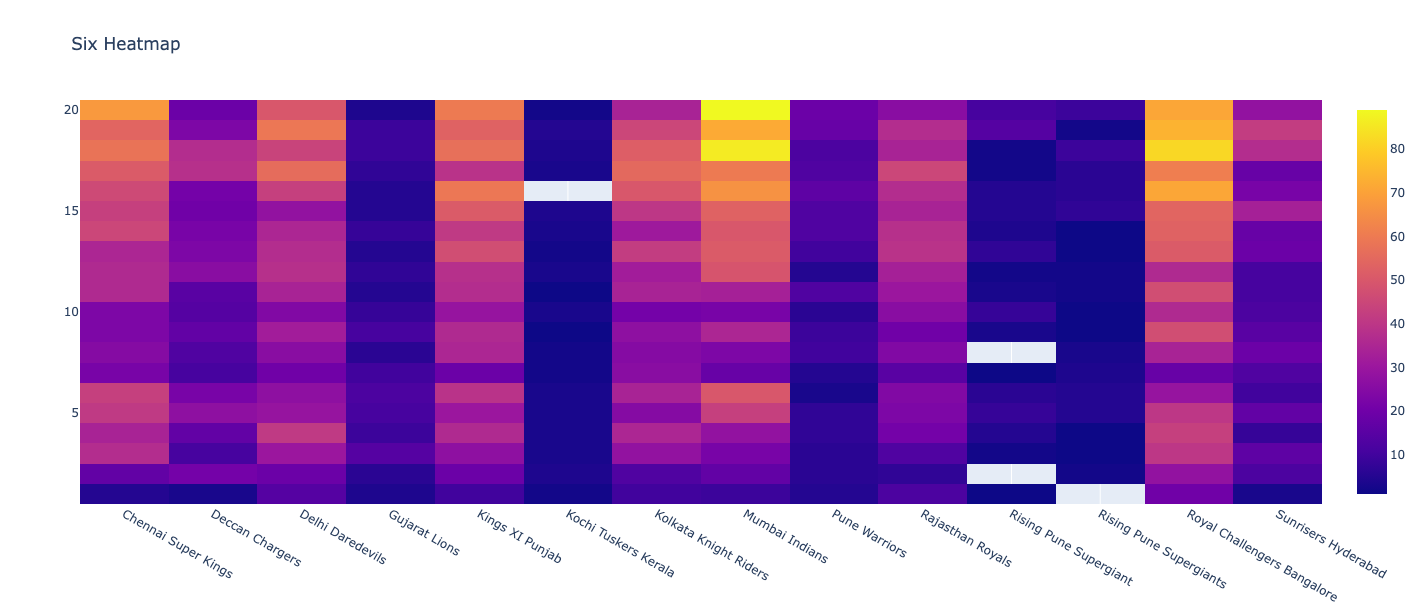

# Side by Side Heatmap

In [72]:
dots=delivery[delivery['batsman_runs']==0]
dots=dots.groupby(['batting_team','over'])['batsman_runs'].count().reset_index()

from plotly import tools

trace1=go.Heatmap(x=six['batting_team'],y=six['over'],
                 z=six['batsman_runs'].values.tolist())

trace2=go.Heatmap(x=dots['batting_team'],y=dots['over'],
                 z=dots['batsman_runs'].values.tolist())


fig=tools.make_subplots(rows=1,cols=2,subplot_titles=["6's","0's"], shared_yaxes=True)

fig.append_trace(trace1,1,1)
fig.append_trace(trace2,1,2)

pyo.plot(fig)

/Users/nimishasingh/anaconda3/lib/python3.10/site-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



'temp-plot.html'

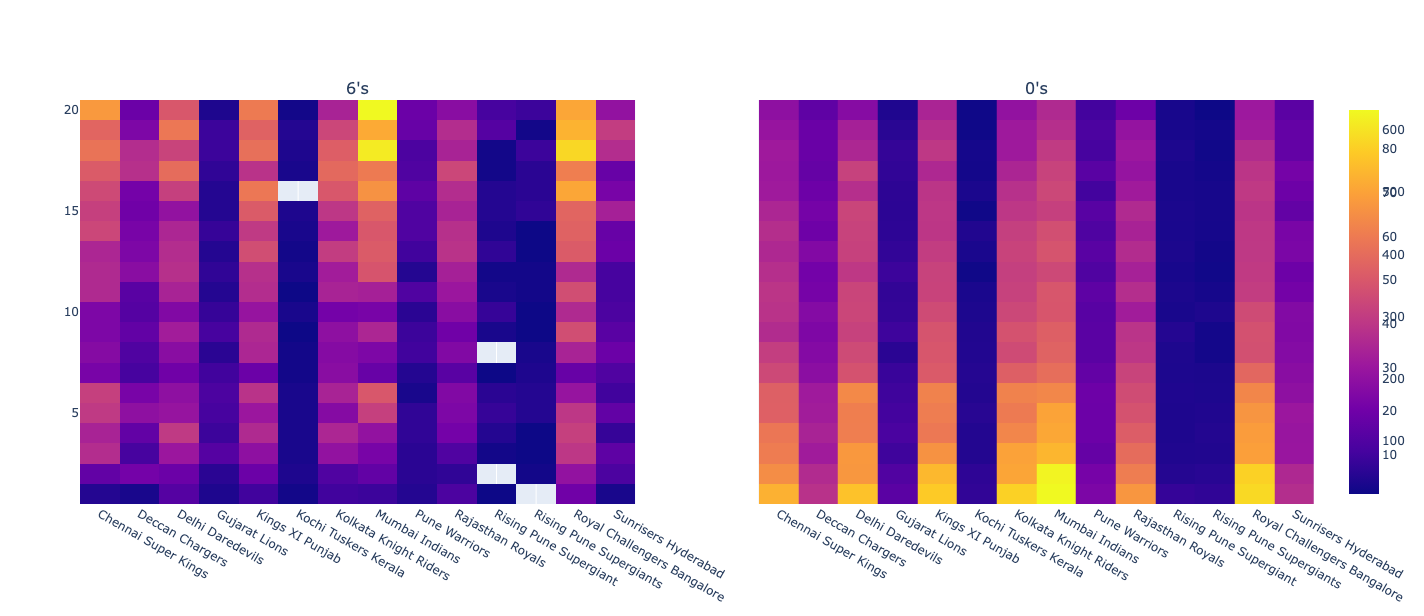

In [73]:
dots

,batting_team,over,batsman_runs
0,Chennai Super Kings,1,524
1,Chennai Super Kings,2,462
2,Chennai Super Kings,3,432
3,Chennai Super Kings,4,421
4,Chennai Super Kings,5,376
...,...,...,...
275,Sunrisers Hyderabad,16,144
276,Sunrisers Hyderabad,17,157
277,Sunrisers Hyderabad,18,128
278,Sunrisers Hyderabad,19,130
